<a href="https://colab.research.google.com/github/9yubean2/ArtificialIntelligence/blob/main/MNIST_ANN_BatchNorm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [3]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.7.0
Uninstalling tensorflow-2.7.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.7.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.7.0


In [4]:
!pip install tensorflow==1.15

     |████████████████████████████████| 412.3 MB 23 kB/s 
     |████████████████████████████████| 50 kB 7.0 MB/s 
     |████████████████████████████████| 503 kB 40.2 MB/s 
     |████████████████████████████████| 3.8 MB 34.0 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=8c5f92f8b4ffe80645af911f518da8b0139433aceb44dacc372dd82b33bae8cd
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Succes

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 Avg. cost =  2.302
Epoch: 0002 Avg. cost =  2.280
Epoch: 0003 Avg. cost =  1.582
Epoch: 0004 Avg. cost =  0.661
Epoch: 0005 Avg. cost =  0.340
Epoch: 0006 Avg. cost =  0.252
Epoch: 0007 Avg. cost =  0.209
Epoch: 0008 Avg. cost =  0.180
Epoch: 0009 Avg. cost =  0.157
Epoch: 0010 Avg. cost =  0.143
Epoch: 0011 Avg. cost =  0.131
Epoch: 0012 Avg. cost =  0.121
Epoch: 0013 Avg. cost =  0.112
Epoch: 0014 Avg. cost =  0.105
Epoch: 0015 Avg. cost =  0.102
Epoch: 0016 Avg. cost =  0.099
Epoch: 0017 Avg. cost =  0.090
Epoch: 0018 Avg. cost =  0.087
Epoch: 0019 Avg. cost =  0.082
Epoch: 0020 Avg. cost =  0.082
Epoch: 0021 Avg. cost =  0.077
Epoch: 0022 Avg. cost =  0.073
Epoch: 0023 Avg. cost =  0.068
Epoch: 0024 Avg. cost =  0.069
Epoch: 0025 Avg. cost =  0.068
Epoch: 0026 Avg. cost =

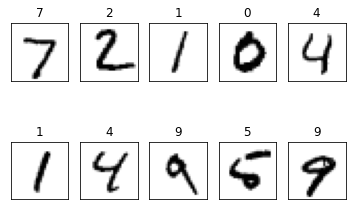

In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data", one_hot=True)

# 신경망 모델 구성
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32) # 추가(dropout은 test시에는 사용하지 않기 때문에)

W1 = tf.Variable(tf.random_normal([784,256],stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))
L1 = tf.nn.dropout(L1, keep_prob) # 추가

W2 = tf.Variable(tf.random_normal([256,256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))
L2 = tf.nn.dropout(L2, keep_prob) # 추가

W3 = tf.Variable(tf.random_normal([256,256], stddev=0.01))
L3 = tf.nn.relu(tf.matmul(L2, W3))
L3 = tf.nn.dropout(L3, keep_prob) # 추가

W4 = tf.Variable(tf.random_normal([256,10], stddev=0.01))
model = tf.matmul(L3, W4)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2
                      (logits=model, labels=Y))


#GradientDescentOptiimizer
optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

# 신경망 모델 학습
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(30):
  total_cost = 0

  for i in range(total_batch):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)

    # 학습 코드 - dropout rate: 0.6 추가
    _, cost_val = sess.run([optimizer, cost], 
                           feed_dict={X: batch_xs, Y: batch_ys, keep_prob: 0.6}) 
    total_cost += cost_val
  
  print('Epoch:', '%04d' % (epoch + 1), 'Avg. cost = ', '{:.3f}'.
        format(total_cost / total_batch))

print('최적화 완료!')

# 결과 확인
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# 예측 코드 - dropout rate: 1 추가
print('정확도: ', sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))

#결과 확인(matplotlib) - 추가
labels = sess.run(model, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1})

fig = plt.figure()
for i in range(10):
  subplot = fig.add_subplot(2, 5, i + 1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title('%d' % np.argmax(labels[i]))
  subplot.imshow(mnist.test.images[i].reshape(28, 28), cmap=plt.cm.gray_r)

plt.show()

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 Avg. cost =  2.302
Epoch: 0002 Avg. cost =  2.275
Epoch: 0003 Avg. cost =  0.937
Epoch: 0004 Avg. cost =  0.344
Epoch: 0005 Avg. cost =  0.211
Epoch: 0006 Avg. cost =  0.147
Epoch: 0007 Avg. cost =  0.114
Epoch: 0008 Avg. cost =  0.088
Epoch: 0009 Avg. cost =  0.074
Epoch: 0010 Avg. cost =  0.061
Epoch: 0011 Avg. cost =  0.050
Epoch: 0012 Avg. cost =  0.043
Epoch: 0013 Avg. cost =  0.035
Epoch: 0014 Avg. cost =  0.029
Epoch: 0015 Avg. cost =  0.022
Epoch: 0016 Avg. cost =  0.018
Epoch: 0017 Avg. cost =  0.016
Epoch: 0018 Avg. cost =  0.012
Epoch: 0019 Avg. cost =  0.010
Epoch: 0020 Avg. cost =  0.007
Epoch: 0021 Avg. cost =  0.005
Epoch: 0022 Avg. cost =  0.003
Epoch: 0023 Avg. cost =  0.002
Epoch: 0024 Avg. cost =  0.002
Epoch: 0025 Avg. cost =  0.001
Epoch: 0026 Avg. cost =

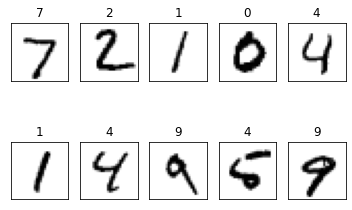

In [22]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data", one_hot=True)

# 신경망 모델 구성
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.Variable(tf.random_normal([784,256],stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))
tf.layers.batch_normalization(L1) #추가(batch nomalization)

W2 = tf.Variable(tf.random_normal([256,256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))
tf.layers.batch_normalization(L2)

W3 = tf.Variable(tf.random_normal([256,256], stddev=0.01))
L3 = tf.nn.relu(tf.matmul(L2, W3))
tf.layers.batch_normalization(L3)

W4 = tf.Variable(tf.random_normal([256,10], stddev=0.01))
model = tf.matmul(L3, W4)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2
                      (logits=model, labels=Y))


#GradientDescentOptiimizer
optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

# 신경망 모델 학습
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(30):
  total_cost = 0

  for i in range(total_batch):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)

    _, cost_val = sess.run([optimizer, cost], 
                           feed_dict={X: batch_xs, Y: batch_ys}) 
    total_cost += cost_val
  
  print('Epoch:', '%04d' % (epoch + 1), 'Avg. cost = ', '{:.3f}'.
        format(total_cost / total_batch))

print('최적화 완료!')

# 결과 확인
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

print('정확도: ', sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

#결과 확인(matplotlib) - 추가
labels = sess.run(model, feed_dict={X: mnist.test.images, Y: mnist.test.labels})

fig = plt.figure()
for i in range(10):
  subplot = fig.add_subplot(2, 5, i + 1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title('%d' % np.argmax(labels[i]))
  subplot.imshow(mnist.test.images[i].reshape(28, 28), cmap=plt.cm.gray_r)

plt.show()